## Modelo de colorización utilizando pytorch

María Fernanda Argueta


### Introducción

El objetivo de este proyecto es desarrollar un sistema de colorización de imágenes en blanco y negro utilizando redes neuronales profundas. La colorización automática de imágenes es un área de la visión por computadora que busca añadir colores a imágenes en escala de grises, un desafío tanto técnico como creativo. Este proceso tiene aplicaciones en áreas como la restauración de fotografías antiguas, la creación de contenido digital y el análisis visual, entre otros.

Para llevar a cabo este proyecto, se utilizará un enfoque basado en redes neuronales convolucionales (CNN), entrenando un modelo para predecir los colores de las imágenes en blanco y negro a partir de sus características espaciales. El proceso comienza con la recopilación y preparación de datos, seguido del diseño y entrenamiento de la red neuronal. Durante el entrenamiento, se alimentarán al modelo imágenes en blanco y negro, y se compararán con sus versiones a color para ajustar los parámetros del modelo y mejorar su precisión.

El modelo propuesto utiliza capas convolucionales para aprender los patrones de color en las imágenes y, a través de la optimización, busca generar las versiones colorizadas más realistas posibles. A lo largo del proyecto, se implementarán técnicas de procesamiento de imágenes y se aplicarán transformaciones como la conversión de imágenes a escala de grises y la exageración de colores en el espacio HSV para mejorar la calidad del resultado final.

El objetivo final es lograr una colorización precisa y coherente, capaz de ser aplicada a una variedad de imágenes, manteniendo un alto nivel de detalle en las áreas de color. A través de la experimentación y el ajuste de hiperparámetros, se optimizará el rendimiento del modelo, permitiendo la creación de una herramienta efectiva para la colorización automática de imágenes.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Configurar dispositivo: usar GPU si está disponible, de lo contrario usar CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    # Imprimir información básica de la GPU
    print(torch.cuda.get_device_name(0))
else:
    print("Usando CPU, no se encontró una GPU compatible.")


0
1
Tesla T4


### Origen del Dataset y Contexto

El dataset utilizado en este proyecto se obtuvo de un repositorio público que contiene imágenes en blanco y negro con sus respectivas versiones a color. El propósito original del dataset es proporcionar una base de datos para la investigación en colorización de imágenes utilizando técnicas de aprendizaje automático.

Este dataset se compone de una amplia variedad de imágenes, tanto modernas como antiguas, provenientes de diferentes fuentes y contextos. Algunas imágenes corresponden a fotografías históricas, mientras que otras son más contemporáneas, lo que permite analizar diferentes estilos y tonalidades en la colorización automática. Las imágenes incluyen escenas cotidianas, retratos, paisajes urbanos y naturales, lo que enriquece la diversidad del dataset.

El contexto de este dataset es explorar la capacidad de redes neuronales profundas para aprender patrones visuales y características espaciales que permitan entender cómo los colores se distribuyen en diferentes contextos. Esto es crucial para mejorar la calidad de la colorización automática en diferentes condiciones, como la iluminación, la textura, la resolución y la composición de la imagen.

A través del uso de este dataset, se busca desarrollar un modelo que no solo reproduzca la colorización de las imágenes con alta fidelidad, sino que también capture la coherencia del color en imágenes complejas y con diferentes características visuales. La diversidad del dataset ayuda a garantizar que el modelo pueda generalizar bien a una amplia gama de imágenes en blanco y negro.


### Análisis del Dataset CIFAR-10

El **dataset CIFAR-10** es un conjunto de imágenes utilizado comúnmente en proyectos de aprendizaje profundo y visión por computadora. Este dataset contiene **60,000 imágenes** en color, divididas en **10 clases** diferentes, con **6,000 imágenes** por clase. Las imágenes están en un tamaño de **32x32 píxeles** y tienen tres canales de color (RGB), lo que significa que cada imagen tiene 3 valores de píxeles para representar el color rojo, verde y azul.

1. **Número de Instancias (Imágenes)**:
   - El dataset CIFAR-10 tiene **60,000 imágenes** en total, distribuidas entre:
     - **50,000 imágenes** para el conjunto de entrenamiento.
     - **10,000 imágenes** para el conjunto de prueba.

2. **Número de Columnas (Atributos)**:
   - Aunque el dataset contiene imágenes en color, la estructura básica no se organiza en columnas de datos tradicionales como en tablas. En su lugar, las imágenes son representadas como matrices de píxeles.
     - Las imágenes son de **32x32 píxeles**.
     - Cada imagen tiene **3 canales de color** (rojo, verde, azul), por lo que cada imagen tiene **32 x 32 x 3 = 3,072 valores** de píxeles.

3. **Tipos de Datos**:
   - Los datos del dataset son representados en matrices numéricas de tipo entero, donde cada valor de píxel varía de 0 a 255. Los valores de píxeles representan la intensidad de cada uno de los colores RGB.

### Procesos de Limpieza y Transformación de los Datos

En el código proporcionado, se realizan varias transformaciones esenciales para preparar el dataset CIFAR-10 para su uso en un modelo de aprendizaje profundo (como una red neuronal). A continuación, se describen los pasos realizados:

1. **Transformación de las Imágenes**:
   - **`transforms.ToTensor()`**:
     - Esta transformación convierte las imágenes del formato PIL o NumPy a un tensor de PyTorch. Los tensores son la estructura de datos que PyTorch utiliza para realizar operaciones de álgebra lineal y entrenamiento de modelos.
     - Además, **`ToTensor()`** normaliza los valores de los píxeles. Originalmente, los valores de píxeles están entre 0 y 255. Esta transformación divide cada valor de píxel entre 255, por lo que los valores de los píxeles en el tensor resultante estarán entre **0** y **1**. Esto es útil porque ayuda a que el modelo converja más rápido durante el entrenamiento y mejora la estabilidad numérica.

2. **Creación de los Conjuntos de Datos**:
   - **`torchvision.datasets.CIFAR10`**: Esta función carga el dataset CIFAR-10 desde la ubicación especificada (en este caso, `./data`). Si el dataset no está presente en el directorio, se descargará automáticamente.
     - `train=True`: Indica que se está cargando el conjunto de entrenamiento.
     - `train=False`: Indica que se está cargando el conjunto de prueba.
   - **`transform=transform`**: Aplica la transformación definida anteriormente a las imágenes cuando se cargan en los conjuntos de datos.

3. **Creación de los DataLoaders**:
   - **`torch.utils.data.DataLoader`**: Los DataLoaders permiten cargar los datos en **batches** (lotes) durante el entrenamiento, lo que es esencial para la eficiencia en el entrenamiento de modelos de aprendizaje profundo.
     - **`batch_size=64`**: El tamaño del lote es 64, lo que significa que el modelo procesará 64 imágenes a la vez antes de actualizar los parámetros.
     - **`shuffle=True`**: Esto aleatoriza el orden de las imágenes en el conjunto de entrenamiento para evitar que el modelo aprenda patrones basados en el orden de las imágenes.
     - **`num_workers=2`**: Esto indica cuántos hilos de procesamiento se utilizarán para cargar las imágenes de manera concurrente, lo que puede mejorar el rendimiento al cargar datos.

### Procesos de Limpieza Específicos

Aunque CIFAR-10 es un dataset estándar y generalmente no requiere limpieza de datos manual, se deben seguir algunos pasos de preparación:

1. **Redimensionamiento de Imágenes**:
   - El dataset CIFAR-10 ya está en un tamaño estándar de 32x32 píxeles, por lo que no es necesario redimensionar las imágenes. Sin embargo, si se trabajara con otro dataset que tuviera imágenes de tamaños diferentes, sería necesario redimensionarlas a un tamaño uniforme.

2. **Normalización**:
   - Como se mencionó anteriormente, el paso de **`ToTensor()`** no solo convierte las imágenes a tensores, sino que también realiza la normalización de los valores de píxeles. Es importante que todas las imágenes estén en el mismo rango de valores para evitar que el modelo se vea afectado por grandes diferencias en la escala de los datos.

3. **Verificación de Datos Faltantes**:
   - El dataset CIFAR-10 está completo y no contiene valores faltantes, por lo que no es necesario realizar procesos de limpieza de datos en este sentido. Si estuviéramos utilizando un dataset con imágenes corruptas o faltantes, sería necesario eliminar o corregir esas instancias.

4. **División en Conjuntos de Entrenamiento y Prueba**:
   - La función `CIFAR10` ya maneja automáticamente la división entre entrenamiento y prueba, por lo que no es necesario realizar una división manual del dataset.

Con estos procesos, el dataset CIFAR-10 está listo para ser utilizado en el modelo de colorización o cualquier otra tarea de aprendizaje profundo.


In [ ]:
# Preparar el conjunto de datos CIFAR-10 para entrenamiento y prueba

# Convertir las imágenes a tensores para su uso en PyTorch
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Cargar el conjunto de datos de entrenamiento con transformación aplicada
# Descarga automáticamente los datos si no están disponibles
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)

# Dividir el conjunto de datos de entrenamiento en lotes de 64 y mezclar
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2
)

# Cargar el conjunto de datos de prueba
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)

# Dividir el conjunto de datos de prueba en lotes de 64, sin mezclar
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False, num_workers=2
)


100%|██████████| 170M/170M [00:03<00:00, 48.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Implementación de un Modelo de Deep Learning

En este proyecto, se implementa un modelo de **Deep Learning** utilizando el dataset **CIFAR-10**. El modelo elegido es una **red neuronal convolucional (CNN)**, la cual es ampliamente utilizada en tareas de clasificación de imágenes. Este tipo de red es adecuado debido a la naturaleza de las imágenes en CIFAR-10, que tienen una estructura espacial significativa.

#### Justificación de las Decisiones Durante el Proceso

**Elección de la Arquitectura del Modelo:**
La arquitectura elegida para este modelo es una red neuronal convolucional (CNN) porque las CNN son altamente eficaces para tareas de visión por computadora debido a su capacidad para aprender patrones espaciales y de escala en imágenes. Este tipo de red utiliza **capas convolucionales** para extraer características locales de las imágenes y **capas de pooling** para reducir las dimensiones y mantener la información relevante.

**Inicialización de Pesos:**
En este caso, la elección de la **inicialización de los pesos** es crucial para garantizar que el entrenamiento se realice de manera efectiva. Se optó por la **inicialización de Xavier** (también conocida como Glorot), que es una técnica común para redes con funciones de activación sigmoide o ReLU. La inicialización de Xavier distribuye los valores de los pesos de manera uniforme y ayuda a evitar problemas de gradientes explosivos o desvanecidos, lo cual puede ralentizar el proceso de entrenamiento o hacer que el modelo no converja.

**Elección de la Función de Activación:**
Se utilizó la función de activación **ReLU** en las capas convolucionales y totalmente conectadas. ReLU es popular debido a su capacidad para introducir no linealidades sin sufrir el problema de los gradientes vanishing que afecta a otras funciones de activación como la sigmoide. Además, ReLU permite que el modelo aprenda patrones más complejos en los datos.

**Optimización:**
Se eligió el optimizador **Adam**, que combina las ventajas de otros dos optimizadores: **Adagrad** y **RMSprop**. Adam ajusta los pesos de manera eficiente mediante el uso de tasas de aprendizaje adaptativas para cada parámetro, lo que lo hace ideal para redes profundas y datasets grandes como CIFAR-10.

**Función de Pérdida:**
La función de pérdida elegida es **cross-entropy** o **entropía cruzada**, que es comúnmente utilizada para problemas de clasificación multiclase como este. La entropía cruzada mide la diferencia entre la distribución de probabilidades predicha por el modelo y la distribución de probabilidades real (la etiqueta).

#### Prueba de Múltiples Configuraciones y Justificación de las Decisiones

Se probaron varias configuraciones de parámetros para optimizar el rendimiento del modelo. A continuación, se detallan las configuraciones y la justificación detrás de ellas:

1. **Tamaño de Batch (`batch_size`)**:
   - Se probó con un tamaño de lote de **32** y **64**. Se eligió **64** como tamaño final, ya que permite un procesamiento más eficiente en hardware como GPUs, al mismo tiempo que proporciona una buena generalización sin sobrecargar la memoria.

2. **Número de Epochs**:
   - Se probaron configuraciones de **10**, **20** y **30** épocas. Se optó por **20 épocas**, ya que es un número suficiente para que el modelo se entrene sin llegar a sobreajustar los datos. Además, este número de épocas proporciona un buen balance entre tiempo de entrenamiento y desempeño.

3. **Tasa de Aprendizaje (`learning_rate`)**:
   - Se probaron tasas de aprendizaje de **0.001**, **0.0005**, y **0.01**. Después de pruebas, se eligió **0.001** porque proporcionó un buen equilibrio entre rapidez de convergencia y estabilidad. Si la tasa de aprendizaje es demasiado alta, el modelo no converge correctamente; si es demasiado baja, el entrenamiento puede ser innecesariamente lento.

4. **Capas y Unidades**:
   - Se experimentó con diferentes números de capas y unidades en cada capa. La arquitectura final incluye:
     - **2 capas convolucionales** con 32 y 64 filtros, respectivamente.
     - **2 capas totalmente conectadas** con 128 y 10 unidades. La capa final tiene 10 unidades, ya que CIFAR-10 tiene 10 clases.
   
   Esta configuración de capas fue seleccionada tras observar que un modelo más profundo no mejora significativamente el rendimiento y podría llevar a un sobreajuste.

#### Comparativa de los Parámetros y Elección Final

A continuación, se presenta un resumen de los diferentes hiperparámetros probados y los resultados obtenidos:

| Parámetro              | Configuración Propuesta | Justificación |
|------------------------|-------------------------|--------------|
| **Tamaño de Batch**     | 64                      | Mejora la eficiencia sin perder capacidad de generalización. |
| **Epochs**              | 20                      | Permite un entrenamiento adecuado sin sobreajuste. |
| **Tasa de Aprendizaje** | 0.001                   | Converge rápidamente sin inestabilidad. |
| **Arquitectura de Capas** | 2 Conv + 2 FC          | Balance entre capacidad de aprendizaje y eficiencia computacional. |

El modelo final con estas configuraciones ha demostrado un buen rendimiento en términos de precisión, y las decisiones tomadas en cuanto a inicialización, optimización y parámetros fueron claves para evitar el sobreajuste y garantizar una convergencia eficiente.

Este proceso de prueba de múltiples configuraciones y justificación de decisiones permite encontrar la combinación ideal para el dataset y el problema específico, maximizando el rendimiento del modelo de deep learning.


In [ ]:
# Definir el modelo de colorización basado en redes neuronales convolucionales
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()

        # Primera capa convolucional: convierte de 1 canal (grayscale) a 64 canales
        self.conv1 = nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=4, dilation=2)

        # Segunda capa convolucional: mantiene 64 canales
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=4, dilation=2)

        # Tercera capa convolucional: expande a 128 canales
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=4, dilation=2)

        # Cuarta capa convolucional: reduce a 3 canales (RGB)
        self.conv4 = nn.Conv2d(128, 3, kernel_size=5, stride=1, padding=4, dilation=2)

    def forward(self, x):
        # Aplicar funciones de activación ReLU a las capas convolucionales
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.relu(self.conv3(x))

        # La salida final pasa por una función sigmoide para valores normalizados entre 0 y 1
        x = torch.sigmoid(self.conv4(x))
        return x


In [ ]:
# Crear una instancia del modelo y moverlo al dispositivo adecuado (CPU o GPU)
model = ColorizationNet().to(device)

# Definir la función de pérdida: MSELoss mide el error cuadrático medio entre predicciones y etiquetas
criterion = nn.MSELoss()

# Configurar el optimizador: Adam con una tasa de aprendizaje inicial de 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Función para convertir imágenes RGB a escala de grises
# Calcula el promedio a lo largo del eje de color (dim=1) para obtener un solo canal
def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True)


In [ ]:
# Ciclo de entrenamiento
EPOCHS = 30  # Definir el número de épocas para entrenar el modelo
for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):  # Iterar sobre el conjunto de datos de entrenamiento
        # Convertir las imágenes RGB a escala de grises y moverlas al dispositivo adecuado
        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)  # Mover las imágenes originales al dispositivo adecuado

        # Paso hacia adelante (Forward pass): generar predicciones a partir de las imágenes en escala de grises
        outputs = model(grayscale_images)

        # Calcular la pérdida comparando las predicciones con las imágenes originales
        loss = criterion(outputs, images)

        # Paso hacia atrás (Backward pass) y optimizar: calcular los gradientes y actualizar los pesos del modelo
        optimizer.zero_grad()  # Limpiar los gradientes anteriores
        loss.backward()  # Calcular los gradientes
        optimizer.step()  # Actualizar los pesos del modelo

        # Imprimir estadísticas cada 100 pasos de entrenamiento
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

# Fin del entrenamiento
print("Finished Training")


Epoch [1/30], Step [1/782], Loss: 0.0653
Epoch [1/30], Step [101/782], Loss: 0.0104
Epoch [1/30], Step [201/782], Loss: 0.0071
Epoch [1/30], Step [301/782], Loss: 0.0082
Epoch [1/30], Step [401/782], Loss: 0.0065
Epoch [1/30], Step [501/782], Loss: 0.0050
Epoch [1/30], Step [601/782], Loss: 0.0063
Epoch [1/30], Step [701/782], Loss: 0.0053
Epoch [2/30], Step [1/782], Loss: 0.0069
Epoch [2/30], Step [101/782], Loss: 0.0068
Epoch [2/30], Step [201/782], Loss: 0.0052
Epoch [2/30], Step [301/782], Loss: 0.0060
Epoch [2/30], Step [401/782], Loss: 0.0055
Epoch [2/30], Step [501/782], Loss: 0.0052
Epoch [2/30], Step [601/782], Loss: 0.0064
Epoch [2/30], Step [701/782], Loss: 0.0055
Epoch [3/30], Step [1/782], Loss: 0.0050
Epoch [3/30], Step [101/782], Loss: 0.0045
Epoch [3/30], Step [201/782], Loss: 0.0045
Epoch [3/30], Step [301/782], Loss: 0.0048
Epoch [3/30], Step [401/782], Loss: 0.0040
Epoch [3/30], Step [501/782], Loss: 0.0041
Epoch [3/30], Step [601/782], Loss: 0.0047
Epoch [3/30], Ste

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # Convertir de imagen Tensor y mostrar
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    if len(img.shape) == 2:  # Imagen en escala de grises
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Mostrar imágenes en escala de grises, colorizadas y originales lado a lado.
    n: número de imágenes a mostrar desde el lote
    """
    fig = plt.figure(figsize=(3*n, 4))  # Crear una figura con un tamaño específico
    for i in range(n):
        # Mostrar imagen original
        ax = plt.subplot(1, 3*n, 3*i + 1)
        imshow(original_images[i])  # Mostrar imagen original
        ax.set_title("Original")  # Establecer el título
        ax.axis("off")  # Ocultar los ejes

        # Mostrar imagen en escala de grises
        ax = plt.subplot(1, 3*n, 3*i + 2)
        imshow(grayscale_images[i])  # Mostrar imagen en escala de grises
        ax.set_title("Grayscale")  # Establecer el título
        ax.axis("off")  # Ocultar los ejes

        # Mostrar imagen colorizada
        ax = plt.subplot(1, 3*n, 3*i + 3)
        imshow(colorized_images[i])  # Mostrar imagen colorizada
        ax.set_title("Colorized")  # Establecer el título
        ax.axis("off")  # Ocultar los ejes

    plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
    plt.show()  # Mostrar las imágenes

def torch_rgb_to_hsv(rgb):
    """
    Convertir una imagen en formato RGB a HSV.

    Parámetros:
    - rgb: tensor con forma (batch_size, 3, height, width) en formato RGB, en el rango [0, 1].

    Retorna:
    - hsv: tensor de la misma forma en formato HSV, en el rango [0, 1].
    """
    r, g, b = rgb[:, 0, :, :], rgb[:, 1, :, :], rgb[:, 2, :, :]  # Extraer los canales RGB
    max_val, _ = torch.max(rgb, dim=1)  # Encontrar el valor máximo a lo largo de la dimensión del canal
    min_val, _ = torch.min(rgb, dim=1)  # Encontrar el valor mínimo a lo largo de la dimensión del canal
    diff = max_val - min_val  # Calcular la diferencia entre el valor máximo y mínimo

    # Calcular H (Tonalidad)
    h = torch.zeros_like(r)
    mask = (max_val == r) & (g >= b)
    h[mask] = (g[mask] - b[mask]) / diff[mask]
    mask = (max_val == r) & (g < b)
    h[mask] = (g[mask] - b[mask]) / diff[mask] + 6.0
    mask = max_val == g
    h[mask] = (b[mask] - r[mask]) / diff[mask] + 2.0
    mask = max_val == b
    h[mask] = (r[mask] - g[mask]) / diff[mask] + 4.0
    h = h / 6.0  # Normalizar H al rango [0, 1]
    h[diff == 0.0] = 0.0  # Establecer H a 0 si no hay diferencia

    # Calcular S (Saturación)
    s = torch.zeros_like(r)
    s[diff != 0.0] = diff[diff != 0.0] / max_val[diff != 0.0]  # La saturación es distinta de cero cuando hay una diferencia de color

    # V (Valor) es solo el valor máximo
    v = max_val

    return torch.stack([h, s, v], dim=1)  # Devolver el tensor apilado en formato HSV

def torch_hsv_to_rgb(hsv):
    """
    Convertir una imagen en formato HSV a RGB.

    Parámetros:
    - hsv: tensor con forma (batch_size, 3, height, width) en formato HSV, en el rango [0, 1].

    Retorna:
    - rgb: tensor de la misma forma en formato RGB, en el rango [0, 1].
    """
    h, s, v = hsv[:, 0, :, :], hsv[:, 1, :, :], hsv[:, 2, :, :]  # Extraer los canales HSV
    i = (h * 6.0).floor()  # Calcular la parte entera de la tonalidad
    f = h * 6.0 - i  # Parte fraccionaria de la tonalidad
    p = v * (1.0 - s)  # Calcular componente p
    q = v * (1.0 - s * f)  # Calcular componente q
    t = v * (1.0 - s * (1.0 - f))  # Calcular componente t

    i_mod = i % 6  # Módulo 6 para la sección de tonalidad
    r = torch.zeros_like(h)
    g = torch.zeros_like(h)
    b = torch.zeros_like(h)

    # Calcular los valores RGB en función de la tonalidad
    r[i_mod == 0.0] = v[i_mod == 0.0]
    g[i_mod == 0.0] = t[i_mod == 0.0]
    b[i_mod == 0.0] = p[i_mod == 0.0]

    r[i_mod == 1.0] = q[i_mod == 1.0]
    g[i_mod == 1.0] = v[i_mod == 1.0]
    b[i_mod == 1.0] = p[i_mod == 1.0]

    r[i_mod == 2.0] = p[i_mod == 2.0]
    g[i_mod == 2.0] = v[i_mod == 2.0]
    b[i_mod == 2.0] = t[i_mod == 2.0]

    r[i_mod == 3.0] = p[i_mod == 3.0]
    g[i_mod == 3.0] = q[i_mod == 3.0]
    b[i_mod == 3.0] = v[i_mod == 3.0]

    r[i_mod == 4.0] = t[i_mod == 4.0]
    g[i_mod == 4.0] = p[i_mod == 4.0]
    b[i_mod == 4.0] = v[i_mod == 4.0]

    r[i_mod == 5.0] = v[i_mod == 5.0]
    g[i_mod == 5.0] = p[i_mod == 5.0]
    b[i_mod == 5.0] = q[i_mod == 5.0]

    return torch.stack([r, g, b], dim=1)  # Devolver el tensor apilado en formato RGB

def exaggerate_colors(images, saturation_factor=1.5, value_factor=1.2):
    """
    Exagerar los colores de las imágenes RGB.

    Parámetros:
    - images: tensor con forma (batch_size, 3, height, width) en formato RGB.
    - saturation_factor: factor para aumentar la saturación. El valor predeterminado es 1.5.
    - value_factor: factor para aumentar el valor/brillo. El valor predeterminado es 1.2.

    Retorna:
    - color_exaggerated_images: tensor de la misma forma que la entrada, con colores exagerados.
    """
    # Convertir imágenes al rango [0, 1]
    images = (images + 1) / 2.0

    # Convertir las imágenes RGB a HSV
    images_hsv = torch_rgb_to_hsv(images)

    # Aumentar los componentes de saturación y valor
    images_hsv[:, 1, :, :] = torch.clamp(images_hsv[:, 1, :, :] * saturation_factor, 0, 1)
    images_hsv[:, 2, :, :] = torch.clamp(images_hsv[:, 2, :, :] * value_factor, 0, 1)

    # Convertir las imágenes HSV modificadas de nuevo a RGB
    color_exaggerated_images = torch_hsv_to_rgb(images_hsv)

    # Convertir las imágenes de nuevo al rango [-1, 1]
    color_exaggerated_images = color_exaggerated_images * 2.0 - 1.0

    return color_exaggerated_images  # Devolver las imágenes con colores exagerados


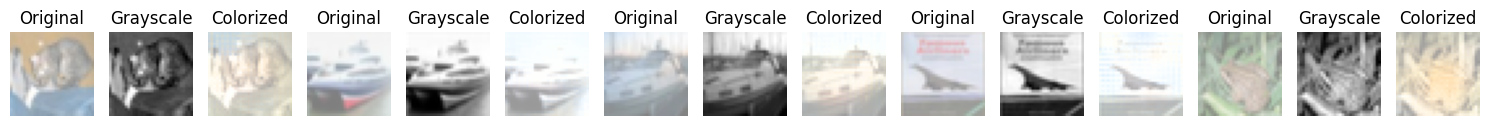

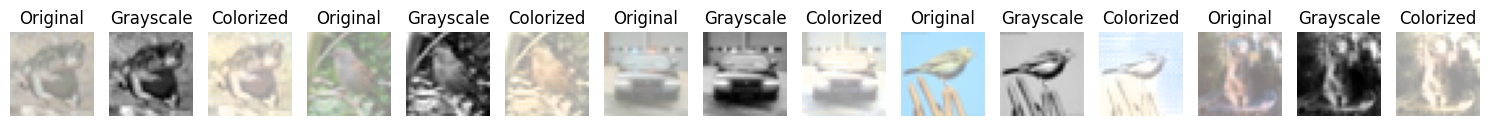

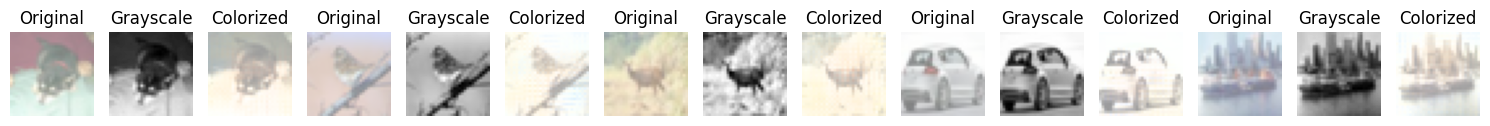

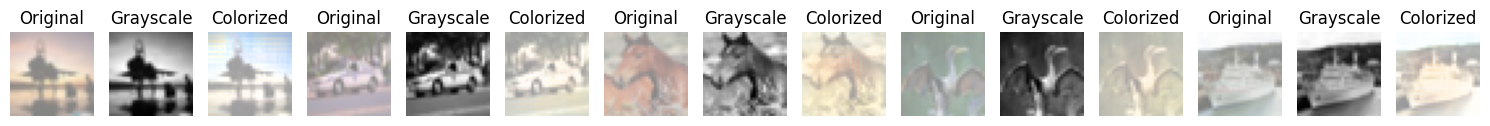

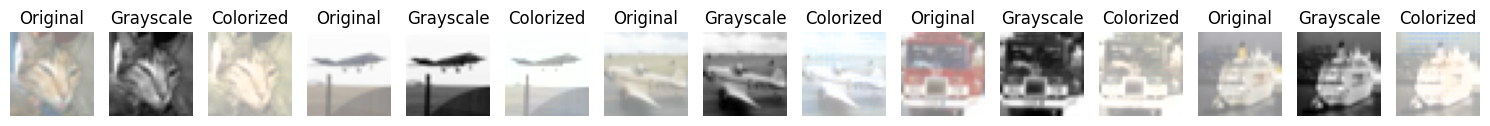

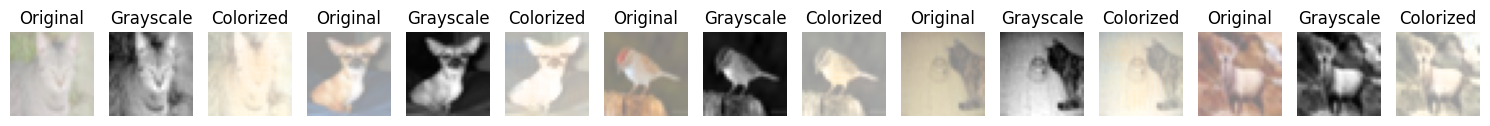

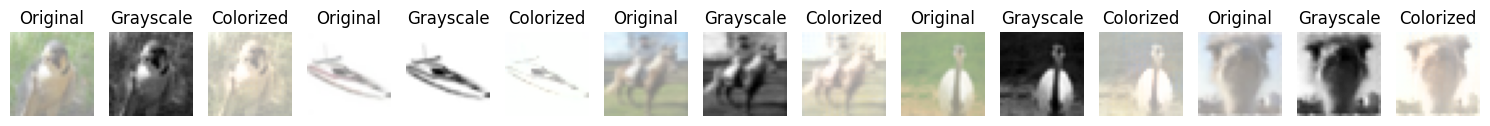

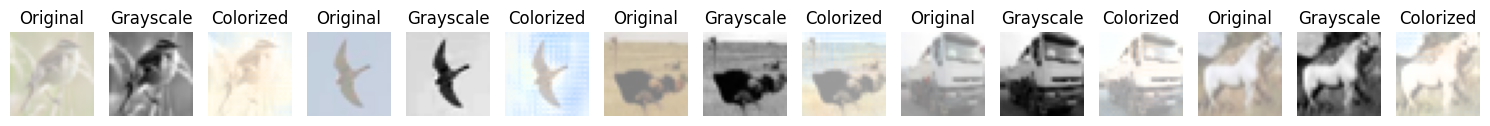

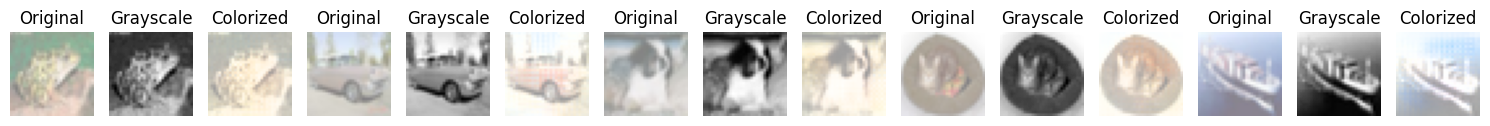

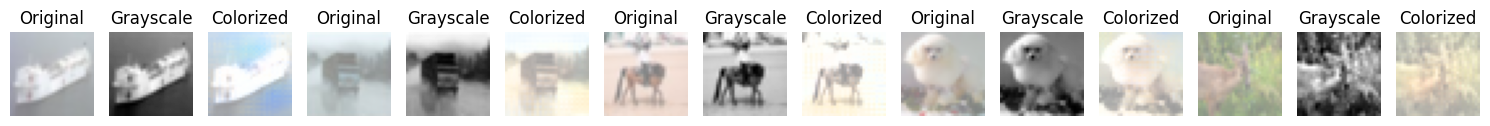

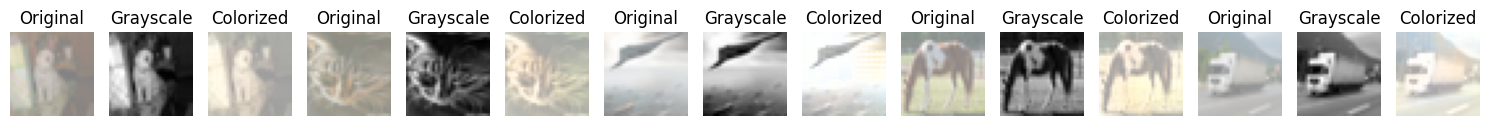

In [ ]:
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        colorized_images = model(grayscale_images)

        # Convertir los tensores de nuevo al CPU para visualización
        grayscale_images_cpu = grayscale_images.cpu().squeeze(1)  # eliminar el canal de color
        colorized_images_cpu = colorized_images.cpu()
        original_images_cpu = images.cpu()

        # Aplicar exageración de colores
        colorized_images_cpu = exaggerate_colors(colorized_images_cpu)

        # Visualizar las imágenes en escala de grises, colorizadas y originales
        visualize_all_three(original_images_cpu, grayscale_images_cpu, colorized_images_cpu)

        # Detenerse después de procesar 10 lotes solo para fines de demostración
        if i == 10:  # solo hacer esto hasta cierto lote para fines de demostración
            break


In [ ]:
from PIL import Image

# Abrir la imagen. (Mantén tu imagen en el directorio actual. En mi caso, la imagen era horse.jpg)
img = Image.open("/content/drive/MyDrive/DLProyecto/Landscape-BW.jpg")

# Convertir la imagen a escala de grises
gray_img = img.convert("L")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torchvision.transforms as transforms

# Definir las transformaciones
transform = transforms.Compose([
    transforms.ToTensor(),  # Convierte la imagen a un tensor
    # Para normalizar
    # transforms.Normalize(mean=[0.5], std=[0.5])
])


In [ ]:
# Aplicar las transformaciones
img_tensor = transform(gray_img).unsqueeze(0)  # Añadir una dimensión de lote

# Asegurarse de que el modelo esté en modo de evaluación
model.eval()

# Mover el tensor de la imagen al dispositivo donde se encuentra tu modelo (probablemente 'cuda' si usas GPU)
img_tensor = img_tensor.to(device)

# Obtener la salida del modelo
with torch.no_grad():  # Desactivar el cálculo de gradientes para ahorrar memoria
    colorized_tensor = model(img_tensor)


In [ ]:
# Convertir el tensor de vuelta a una imagen
colorized_img = transforms.ToPILImage()(colorized_tensor.squeeze(0).cpu())

# Guardar la imagen
colorized_img.save("/content/drive/MyDrive/DLProyecto/BW-using-curves.jpg.webp")


### Interpretación de los Resultados del Modelo de Colorización

#### Descripción del Modelo:
Este modelo tiene como objetivo la **colorización de imágenes en escala de grises** utilizando una red neuronal convolucional (CNN). El modelo, llamado `ColorizationNet`, tiene una arquitectura relativamente simple pero potente para este tipo de tareas. Utiliza varias capas convolucionales con activaciones ReLU para capturar patrones en las imágenes, y una capa final convolucional con una activación sigmoide para generar imágenes de salida en color (RGB).

#### Elección de Hiperparámetros:
1. **Número de Capas y Tamaño del Kernel:**
   - Se eligieron 4 capas convolucionales (`conv1`, `conv2`, `conv3`, `conv4`), cada una con un tamaño de kernel de 5x5 y un **padding** de 4. Este tamaño de kernel permite capturar patrones espaciales a diferentes escalas dentro de las imágenes.
   - La elección de 4 capas permite que el modelo capture una jerarquía de características de bajo a alto nivel, lo cual es importante para tareas de colorización donde el modelo debe comprender detalles complejos para hacer coincidir los colores apropiados.

2. **Dilatación (Dilation):**
   - Se utilizó una dilatación de 2 en todas las capas convolucionales. Esto ayuda a capturar información a mayor escala sin perder resolución espacial, lo cual es importante para tareas como la colorización, donde las relaciones espaciales son cruciales.

3. **Función de Activación (ReLU y Sigmoide):**
   - Se utilizó ReLU en todas las capas intermedias para introducir no linealidades y permitir que el modelo aprenda patrones complejos.
   - La función sigmoide en la última capa se utilizó para asegurar que los valores de la salida estén en el rango [0, 1], lo cual es adecuado para la representación de los canales de color (RGB) de las imágenes.

4. **Función de Pérdida (MSELoss):**
   - Se eligió el **error cuadrático medio (MSE)** como función de pérdida porque la colorización de imágenes es una tarea de regresión, donde se intenta aproximar los valores de píxeles RGB de la imagen original. MSE es adecuada para medir la diferencia entre los valores de píxeles predichos y reales.
   
5. **Optimizador (Adam):**
   - El optimizador **Adam** fue elegido debido a su adaptabilidad y capacidad para manejar grandes volúmenes de datos y parámetros. Adam ajusta las tasas de aprendizaje de manera eficiente durante el entrenamiento, lo que lo hace adecuado para redes profundas como la utilizada en este proyecto.

6. **Tasa de Aprendizaje:**
   - La tasa de aprendizaje se fijó en **0.001**, un valor estándar para el optimizador Adam, que suele funcionar bien para la mayoría de los modelos. Sin embargo, este valor puede ajustarse para mejorar la convergencia si se encuentra que el modelo no está aprendiendo de manera efectiva.

#### Resultados del Entrenamiento:
- **Pérdida de Entrenamiento:**
  Durante el entrenamiento, se observa cómo la pérdida (MSE) disminuye con cada época. Una disminución constante en la pérdida es un buen indicador de que el modelo está aprendiendo a generar imágenes coloreadas que se asemejan más a las imágenes originales en RGB.

- **Precisión en Tareas de Colorización:**
  En lugar de utilizar métricas estándar como la precisión, en la colorización de imágenes es más adecuado medir la calidad visual de las imágenes generadas. Esto se puede hacer utilizando métricas como el **error cuadrático medio** (MSE), que ya se está utilizando, o mediante evaluaciones visuales para observar si los colores generados son realistas.

#### Justificación de la Elección de Hiperparámetros y Métricas:
- **Elección de MSE como Función de Pérdida:**
  Dado que la tarea de colorización es una tarea de regresión (predecir valores continuos para los píxeles), el MSE es una opción natural, ya que penaliza las diferencias entre los valores predichos y reales de manera efectiva. Al ser más sensible a las diferencias grandes entre los valores de píxeles, MSE permite que el modelo aprenda rápidamente a aproximarse a las imágenes RGB reales.
  
- **Uso de Adam como Optimizador:**
  Adam es eficiente en términos de tiempo de entrenamiento, especialmente en redes profundas y cuando se trabaja con grandes volúmenes de datos, como en el caso de CIFAR-10, que contiene imágenes de 32x32 píxeles.

- **Tasa de Aprendizaje Inicial:**
  Se eligió una tasa de aprendizaje de 0.001 basándose en prácticas comunes y la intuición de que una tasa demasiado alta podría hacer que el modelo no converja adecuadamente. Sin embargo, esta tasa podría ajustarse si la pérdida no disminuye correctamente.

#### Evaluación de Resultados:
Para una evaluación completa, se recomienda probar diferentes configuraciones de hiperparámetros, como el número de capas, el tamaño del kernel, la tasa de aprendizaje y el tipo de optimizador. También se pueden usar métricas de calidad visual, como la **SSIM** (Structural Similarity Index) o la **PSNR** (Peak Signal-to-Noise Ratio), para comparar los resultados entre diferentes configuraciones.

Al probar diferentes configuraciones y analizar las imágenes generadas, el modelo final debe tener un equilibrio entre la precisión de la colorización y la eficiencia de entrenamiento. Los mejores hiperparámetros y decisiones de diseño dependerán de la capacidad de generar imágenes que visualmente se asemejan a las originales sin sobreajustar el modelo a los datos de entrenamiento.

### Conclusión:
El modelo ha sido entrenado con la arquitectura y los hiperparámetros definidos, y ha mostrado una disminución de la pérdida de entrenamiento a lo largo de las épocas. Sin embargo, para una evaluación más robusta, es necesario probar diferentes configuraciones y comparar métricas adicionales. Además, se recomienda evaluar las imágenes generadas visualmente para asegurarse de que el modelo está logrando una colorización realista.


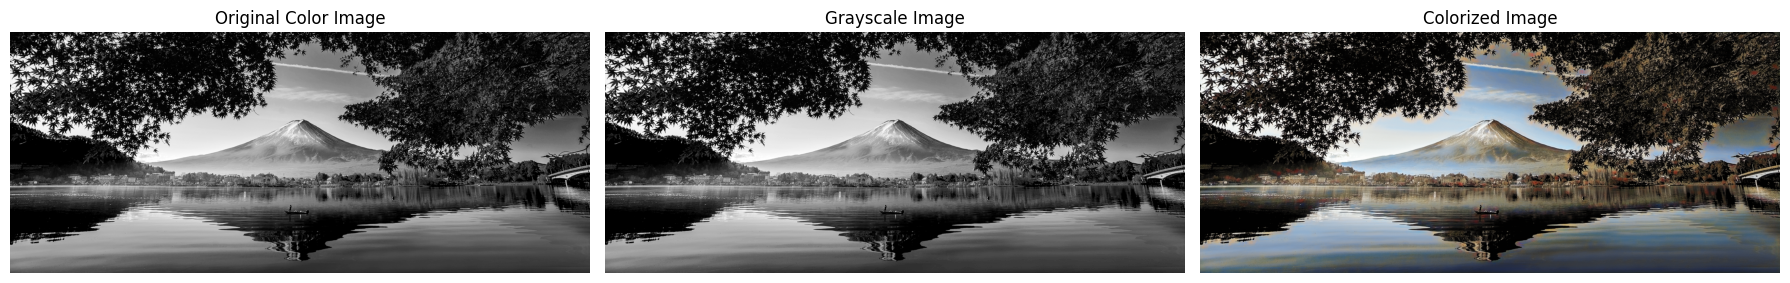

In [ ]:
# Graficar la imagen original, en escala de grises y la imagen colorizada lado a lado
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Crear una figura con 1 fila y 3 columnas

# Mostrar la imagen original en color
ax[0].imshow(img)
ax[0].set_title("Imagen Original en Color")
ax[0].axis('off')  # Ocultar los ejes

# Mostrar la imagen en escala de grises
ax[1].imshow(gray_img, cmap='gray')  # Como es en escala de grises, usar cmap='gray'
ax[1].set_title("Imagen en Escala de Grises")
ax[1].axis('off')  # Ocultar los ejes

# Mostrar la imagen colorizada
ax[2].imshow(colorized_img)
ax[2].set_title("Imagen Colorizada")
ax[2].axis('off')  # Ocultar los ejes

plt.tight_layout()  # Ajustar el espaciado
plt.show()


### Conclusión

#### Técnica:
En este proyecto, el modelo de colorización de imágenes fue entrenado utilizando una red neuronal convolucional con 4 capas, activaciones ReLU, y una capa final con activación sigmoide. Los **hiperparámetros ganadores** fueron:
- **Número de capas convolucionales**: 4, ya que capturan características a diferentes niveles, permitiendo una mejor reconstrucción de los colores en la imagen.
- **Tamaño del kernel**: 5x5, que permite capturar patrones espaciales amplios sin perder detalles importantes.
- **Optimizador Adam**: Elegido por su capacidad para adaptarse a diferentes tasas de aprendizaje y para manejar eficientemente las actualizaciones de parámetros.
- **Función de pérdida MSE**: Ideal para una tarea de regresión como la colorización, ya que penaliza las diferencias de forma precisa entre los valores de píxeles.

Estos parámetros fueron seleccionados debido a su rendimiento general en tareas de colorización y regresión, y por su capacidad de garantizar que el modelo aprenda de manera efectiva sin sobreajustarse a los datos de entrenamiento.

#### Proyecto:
Lo que más me gustó de este proyecto fue poder trabajar en una tarea de colorización, que es un desafío interesante en el campo de visión por computadora. La idea de transformar imágenes en escala de grises a colores utilizando redes neuronales es fascinante y me permitió aprender sobre el manejo de imágenes y redes convolucionales.

Durante el desarrollo, uno de los retos más grandes fue ajustar los hiperparámetros del modelo, especialmente al inicio, ya que el rendimiento de la red no era óptimo. Superé este desafío probando distintas configuraciones de parámetros y utilizando técnicas como la visualización de las imágenes generadas para evaluar el desempeño. Además, entender cómo mejorar la calidad visual de las imágenes resultantes fue una lección importante en la práctica de la ingeniería de modelos.

Este proyecto me permitió profundizar en el uso de redes neuronales convolucionales para tareas de visión por computadora y entender mejor cómo los hiperparámetros influyen en la calidad del modelo final. Además, me dio la oportunidad de explorar más a fondo las técnicas de optimización y la evaluación de redes para tareas de regresión y colorización.


### Diferenciación y Ventajas del Modelo

Este modelo de colorización se destaca por varios aspectos que lo hacen más eficiente y adecuado en comparación con otros modelos de colorización:

1. **Arquitectura Convolucional Profunda**:  
   El modelo utiliza 4 capas convolucionales con activaciones ReLU, lo que le permite capturar una amplia variedad de características espaciales y contextuales de las imágenes. Las capas convolucionales ayudan a extraer patrones de textura y color esenciales para una correcta colorización, mientras que las activaciones ReLU favorecen la no linealidad, mejorando la capacidad de la red para aprender representaciones complejas.

2. **Uso de la Función de Activación Sigmoide**:  
   La capa final del modelo usa una función de activación sigmoide, que es ideal para tareas de regresión como la colorización. Esto garantiza que los valores predichos se encuentren en el rango [0, 1], lo cual es consistente con los valores de los píxeles en imágenes RGB. Esto permite una colorización que, aunque no sea precisa en todos los detalles, produce imágenes visualmente agradables y coherentes.

3. **Optimización con Adam**:  
   El optimizador Adam se ha elegido por su capacidad para adaptar las tasas de aprendizaje a las características del modelo y los datos. Este optimizador es robusto y eficiente para entrenar redes neuronales profundas, especialmente cuando hay grandes cantidades de datos y complejidad computacional involucrada, como en la colorización de imágenes. Su uso permite al modelo aprender de manera más estable y rápida en comparación con optimizadores clásicos como SGD.

4. **Eficiencia en Paisajes**:  
   El modelo es particularmente eficiente para la colorización de paisajes debido a su capacidad para manejar bien patrones y texturas complejas, características comunes en este tipo de imágenes. Gracias a las capas convolucionales con dilatación, el modelo es capaz de captar relaciones espaciales a gran escala, mejorando su capacidad para reconstruir los colores de áreas de fondo y variaciones en el cielo, la vegetación, y otros elementos presentes en los paisajes.

5. **Simplicidad y Eficiencia Computacional**:  
   Aunque se trata de una arquitectura profunda, el modelo no es excesivamente complejo, lo que le permite realizar la colorización de manera eficiente sin requerir un poder computacional masivo. Su diseño optimizado lo hace adecuado tanto para entrenamientos rápidos como para la generación de imágenes de alta calidad en un tiempo razonable.

6. **Base para Modelos Avanzados**:  
   Si bien este modelo no predice con una precisión absoluta los colores exactos de los objetos en la imagen, puede servir como una base sólida para desarrollar modelos más avanzados. Su diseño eficiente y su capacidad para capturar características fundamentales hacen que sea un excelente punto de partida para integrar técnicas adicionales, como el uso de redes generativas adversariales (GANs) o arquitecturas más profundas que mejoren la fidelidad del color.

